In [0]:
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.sql import functions as F
from pyspark.sql.window import Window
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [0]:
spark = SparkSession.builder.getOrCreate()

In [0]:
# File location and type
file_location = "/FileStore/tables/data/EURUSD_tick_UTC_0_00_2014_Parse.csv"
file_type="csv"
# read csv file
EURUSD_tqdata = spark.read.format(file_type).load(path=file_location,
    header=False,
    inferSchema=True,
                              )
display(EURUSD_tqdata)

EURUSD_tqdata.show(5)

_c0,_c1,_c2,_c3,_c4
UTC,AskPrice,BidPrice,AskVolume,BidVolume
2014-01-01T22:00:59.209+00:00,1.37552,1.37637,0.15,0.15
2014-01-01T22:01:13.478+00:00,1.37553,1.37637,0.1,0.1
2014-01-01T22:01:16.148+00:00,1.37558,1.37648,0.53,0.15
2014-01-01T22:01:16.669+00:00,1.37558,1.37629,0.53,0.1
2014-01-01T22:01:16.904+00:00,1.37558,1.37628,0.53,0.75
2014-01-01T22:01:16.969+00:00,1.37563,1.37628,0.23,0.75
2014-01-01T22:01:17.843+00:00,1.37563,1.37627,0.23,0.15
2014-01-01T22:01:19.822+00:00,1.37552,1.37627,0.15,0.6
2014-01-01T22:01:20.055+00:00,1.37554,1.37627,0.1,0.45


+--------------------+--------+--------+---------+---------+
|                 _c0|     _c1|     _c2|      _c3|      _c4|
+--------------------+--------+--------+---------+---------+
|                 UTC|AskPrice|BidPrice|AskVolume|BidVolume|
|2014-01-01T22:00:...| 1.37552| 1.37637|     0.15|     0.15|
|2014-01-01T22:01:...| 1.37553| 1.37637|      0.1|      0.1|
|2014-01-01T22:01:...| 1.37558| 1.37648|     0.53|     0.15|
|2014-01-01T22:01:...| 1.37558| 1.37629|     0.53|      0.1|
+--------------------+--------+--------+---------+---------+
only showing top 5 rows



In [0]:
column_mapping = {
    "_c0": "UTC",
    "_c1": "BidPrice",
    "_c2": "AskPrice",
    "_c3": "BidVolume",
    "_c4": "AskVolume"
}
for old_name, new_name in column_mapping.items():
    EURUSD_tqdata = EURUSD_tqdata.withColumnRenamed(old_name, new_name)
    
EURUSD_tqdata.show(5)

+--------------------+--------+--------+---------+---------+
|                 UTC|BidPrice|AskPrice|BidVolume|AskVolume|
+--------------------+--------+--------+---------+---------+
|                 UTC|AskPrice|BidPrice|AskVolume|BidVolume|
|2014-01-01T22:00:...| 1.37552| 1.37637|     0.15|     0.15|
|2014-01-01T22:01:...| 1.37553| 1.37637|      0.1|      0.1|
|2014-01-01T22:01:...| 1.37558| 1.37648|     0.53|     0.15|
|2014-01-01T22:01:...| 1.37558| 1.37629|     0.53|      0.1|
+--------------------+--------+--------+---------+---------+
only showing top 5 rows



In [0]:
from pyspark.sql import functions as F

# Calculating MidPrice as the average of BidPrice and AskPrice
EURUSD_tqdata = EURUSD_tqdata.withColumn("MidPrice", (F.col("BidPrice") + F.col("AskPrice")) / 2)

# Show the first few rows
EURUSD_tqdata.show(5)

+--------------------+--------+--------+---------+---------+------------------+
|                 UTC|BidPrice|AskPrice|BidVolume|AskVolume|          MidPrice|
+--------------------+--------+--------+---------+---------+------------------+
|                 UTC|AskPrice|BidPrice|AskVolume|BidVolume|              NULL|
|2014-01-01T22:00:...| 1.37552| 1.37637|     0.15|     0.15|1.3759450000000002|
|2014-01-01T22:01:...| 1.37553| 1.37637|      0.1|      0.1|           1.37595|
|2014-01-01T22:01:...| 1.37558| 1.37648|     0.53|     0.15|           1.37603|
|2014-01-01T22:01:...| 1.37558| 1.37629|     0.53|      0.1|1.3759350000000001|
+--------------------+--------+--------+---------+---------+------------------+
only showing top 5 rows



In [0]:
from pyspark.sql.window import Window

# Calculate TickDirection: 1 if price increased, -1 if decreased, 0 if same
windowSpec = Window.orderBy("UTC")

EURUSD_tqdata = EURUSD_tqdata.withColumn(
    "TickDirection",
    F.when(
        F.col("MidPrice") > F.lag("MidPrice", 1).over(windowSpec), 1
    ).when(
        F.col("MidPrice") < F.lag("MidPrice", 1).over(windowSpec), 0
    ).otherwise(0)  # Use 0 for no change or first row
)

# Show the first few rows
EURUSD_tqdata.show(5)

+--------------------+--------+--------+---------+---------+------------------+-------------+
|                 UTC|BidPrice|AskPrice|BidVolume|AskVolume|          MidPrice|TickDirection|
+--------------------+--------+--------+---------+---------+------------------+-------------+
|2014-01-01T22:00:...| 1.37552| 1.37637|     0.15|     0.15|1.3759450000000002|            0|
|2014-01-01T22:01:...| 1.37553| 1.37637|      0.1|      0.1|           1.37595|            1|
|2014-01-01T22:01:...| 1.37558| 1.37648|     0.53|     0.15|           1.37603|            1|
|2014-01-01T22:01:...| 1.37558| 1.37629|     0.53|      0.1|1.3759350000000001|            0|
|2014-01-01T22:01:...| 1.37558| 1.37628|     0.53|     0.75|1.3759299999999999|            0|
+--------------------+--------+--------+---------+---------+------------------+-------------+
only showing top 5 rows



In [0]:

#Calculate BidAskSpread
EURUSD_tqdata = EURUSD_tqdata.withColumn(
    "BidAskSpread", 
    F.col("AskPrice") - F.col("BidPrice")
)

#Calculate PriceImbalance
EURUSD_tqdata = EURUSD_tqdata.withColumn(
    "PriceImbalance",
    (F.col("BidVolume") - F.col("AskVolume")) / 
    (F.col("BidVolume") + F.col("AskVolume"))
)

#Calculate LiquidityRatio
EURUSD_tqdata = EURUSD_tqdata.withColumn(
    "LiquidityRatio",
    (F.col("BidVolume") - F.col("AskVolume")) / 
    F.col("BidAskSpread")
)

#Calculate Log Returns (need window function)
windowSpec = Window.orderBy("UTC")  # Assuming you have a Timestamp column

EURUSD_tqdata = EURUSD_tqdata.withColumn(
    "LogReturn",
    F.log(F.col("MidPrice") / F.lag("MidPrice", 1).over(windowSpec))
)

#Calculate Rolling Volatility (30-period)
rollingWindow = Window.orderBy("UTC").rowsBetween(-29, 0)

EURUSD_tqdata = EURUSD_tqdata.withColumn(
    "Volatility",
    F.stddev("MidPrice").over(rollingWindow)
)

#Filter rows with BidPrice > 0 and spreads < 0.0001
EURUSD_tqdata_filtered = EURUSD_tqdata.filter(
    (F.col("BidPrice") > 0) & 
    (F.col("BidAskSpread") < 0.0001)
)

# Show results
# print("Original Data with Calculations:")
# EURUSD_tqdata.show(5)

print("\nFiltered Data:")
# EURUSD_tqdata_filtered.show(5)

display(EURUSD_tqdata_filtered.limit(5).toPandas().head())


Filtered Data:


UTC,BidPrice,AskPrice,BidVolume,AskVolume,MidPrice,TickDirection,BidAskSpread,PriceImbalance,LiquidityRatio,LogReturn,Volatility
2014-01-01T22:13:18.031+00:00,1.3753799999999998,1.37547,1.5,1.38,1.375425,0,9.000000000014552E-5,0.041666666666666706,1333.3333333311787,-1.0905660583328684E-5,1.1908221828901118E-4
2014-01-01T22:13:25.456+00:00,1.37543,1.3754899999999999,1.5,1.0,1.37546,1,5.999999999994898E-5,0.2,8333.333333340419,2.544635635578624E-5,1.2225844116776758E-4
2014-01-01T22:13:28.947+00:00,1.3753,1.3754,1.0,1.0,1.37535,0,9.999999999998899E-5,0.0,0.0,-7.270850071504814E-6,1.5310399515793563E-4
2014-01-01T22:13:34.977+00:00,1.37534,1.37544,1.0,1.0,1.37539,0,9.999999999998899E-5,0.0,0.0,-7.270638616668071E-6,1.6569602413402465E-4
2014-01-01T22:13:35.968+00:00,1.37534,1.37543,1.0,1.0,1.375385,0,8.999999999992347E-5,0.0,0.0,-3.635339131514386E-6,1.6720178462430917E-4


In [0]:
from pyspark.sql.types import DoubleType, IntegerType

# Cast relevant features to double
feature_cols = [
    "BidPrice", "AskPrice", "BidVolume", "AskVolume", "MidPrice",
    "BidAskSpread", "PriceImbalance", "LiquidityRatio", "LogReturn", "Volatility"]

# Ensure all feature columns are DoubleType
for col_name in feature_cols:
    EURUSD_tqdata_filtered = EURUSD_tqdata_filtered.withColumn(col_name, EURUSD_tqdata_filtered[col_name].cast(DoubleType()))


In [0]:
from pyspark.sql.functions import lag, when, col, to_timestamp, unix_timestamp


# Prepare data
EURUSD_sample = EURUSD_tqdata_filtered.sample(withReplacement=False, fraction=0.2, seed=42).cache()
window_spec = Window.orderBy("UTC")


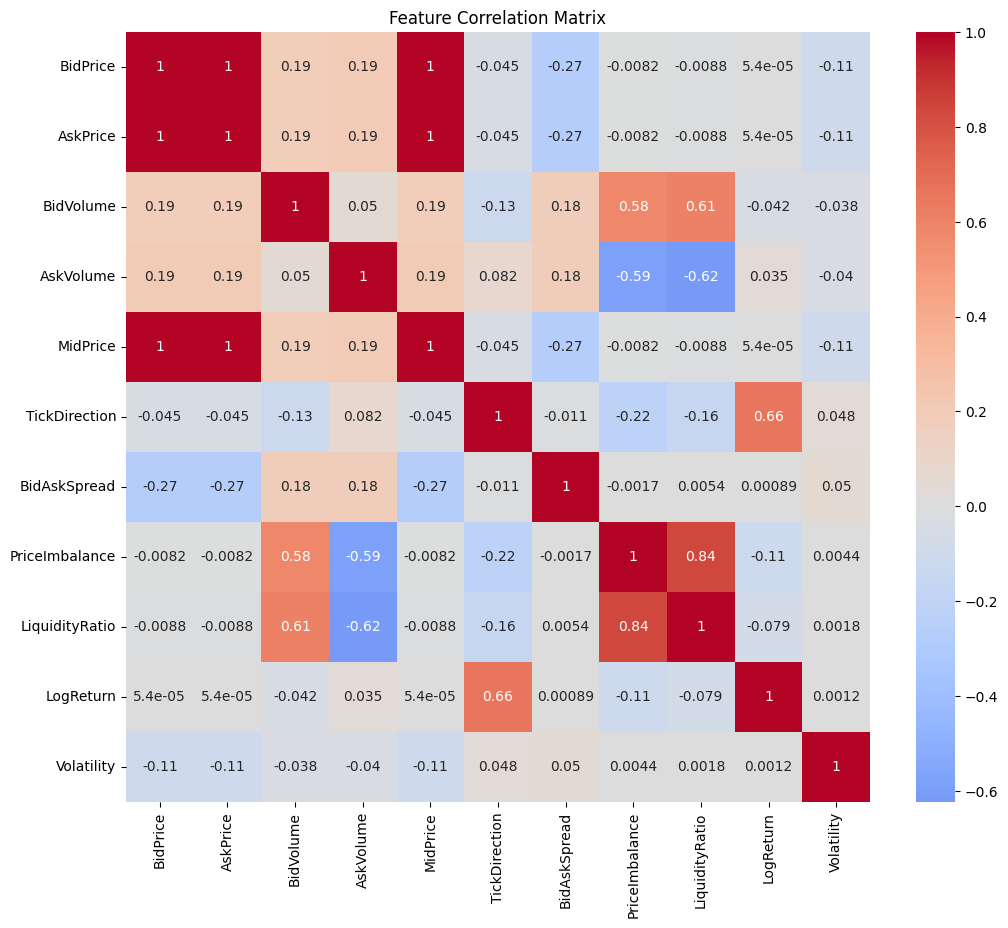

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Feature correlation analysis
# Convert to Pandas DataFrame for correlation matrix
numeric_cols = [f.name for f in EURUSD_sample.schema.fields if isinstance(f.dataType, (DoubleType, IntegerType))]
pdf = EURUSD_sample.select(numeric_cols).toPandas()

# Calculate correlation matrix
corr_matrix = pdf.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

In [0]:
from pyspark.ml.feature import VectorAssembler, MinMaxScaler
from pyspark.ml.regression import GBTRegressor
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define features and target
feature_cols = [
    "BidVolume", "AskVolume", "PriceImbalance", "BidAskSpread", 
    "LiquidityRatio", "Volatility", "TickDirection"
]
target_col = "LogReturn"

# Assemble features before normalization
df = VectorAssembler(inputCols=feature_cols, outputCol="rawFeatures")
df = df.transform(EURUSD_sample)

# Normalize features
scaler = MinMaxScaler(inputCol="rawFeatures", outputCol="features")
scaler_model = scaler.fit(df)
normalized_df = scaler_model.transform(df).select("features", target_col)
normalized_df = normalized_df.withColumnRenamed(target_col, "label").cache()

# Time-based train-test split
count = normalized_df.count()
train_count = int(count * 0.8)
train_df = normalized_df.limit(train_count)
test_df = normalized_df.subtract(train_df)

# Define GBT Regressor
gbt = GBTRegressor(featuresCol="features", labelCol=target_col, seed=42)

# Parameter grid for tuning
paramGrid = (ParamGridBuilder()
    .addGrid(gbt.maxDepth, [5, 10])
    .addGrid(gbt.maxIter, [50, 100])
    .addGrid(gbt.stepSize, [0.0001])
    .build())

# Evaluator
evaluator = RegressionEvaluator(labelCol=target_col, predictionCol="prediction", metricName="rmse")

# CrossValidator setup
cv = CrossValidator(
    estimator=gbt,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=2,
    parallelism=2
)

# Fit model
cvModel = cv.fit(train_df)

# Predict
predictions = cvModel.transform(test_df)

# Evaluate
y_true = predictions.select(target_col).toPandas().values.flatten()
y_pred = predictions.select("prediction").toPandas().values.flatten()

mse = mean_squared_error(y_true, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

print("Best Hyperparameters:", cvModel.bestModel.extractParamMap())
print(f"RMSE: {rmse:.6f}")
print(f"MAE:  {mae:.6f}")
print(f"MSE:  {mse:.6f}")
print(f"R²:   {r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_true, label='Actual Log Return', linewidth=2)
plt.plot(y_pred, label='Predicted Log Return', linewidth=2)
plt.title('GBTRegressor Log Return Prediction')
plt.xlabel('Time Index')
plt.ylabel('Log Return')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


---------------------------------------------------------------------------
IllegalArgumentException                  Traceback (most recent call last)
File <command-1329012462685973>, line 55
     46 cv = CrossValidator(
     47     estimator=gbt,
     48     estimatorParamMaps=paramGrid,
   (...)
     51     parallelism=2
     52 )
     54 # Fit model
---> 55 cvModel = cv.fit(train_df)
     57 # Predict
     58 predictions = cvModel.transform(test_df)

File /databricks/python_shell/lib/dbruntime/MLWorkloadsInstrumentation/_pyspark.py:30, in _create_patch_function.<locals>.patched_method(self, *args, **kwargs)
     28 call_succeeded = False
     29 try:
---> 30     result = original_method(self, *args, **kwargs)
     31     call_succeeded = True
     32     return result

File /databricks/python/lib/python3.11/site-packages/mlflow/utils/autologging_utils/safety.py:578, in safe_patch.<locals>.safe_patch_function(*args, **kwargs)
    576     patch_function.call(call_original, *args, **k